# **About Dataset**

Car Price Prediction Dataset Description:

This dataset contains 10,000 entries created for the purpose of predicting car prices. Each row represents information about a car and its price. The descriptions of the columns are as follows:

**Columns Descriptions:**

**Brand:** Specifies the brand of the car (e.g., Toyota, BMW, Ford).
Example values: "Toyota", "BMW", "Mercedes".

**Model:** Specifies the model of the car (e.g., Corolla, Focus, X5).
Example values: "Corolla", "Focus", "X5".

**Year:** The production year of the car. Newer years typically indicate higher prices.
Example values: 2005, 2018, 2023.

**Engine_Size:** Specifies the engine size in liters (L). Larger engines generally correlate with higher prices.
Example values: 1.6, 2.0, 3.5.

**Fuel_Type:** indicates the type of fuel used by the car:
Petrol: Cars running on gasoline.
Diesel: Cars running on diesel fuel.
Hybrid: Cars that use both fuel and electricity.
Electric: Fully electric cars.

**Transmission:** The type of transmission in the car:
Manual: Manual transmission.
Automatic: Automatic transmission.
Semi-Automatic: Semi-automatic transmission.

**Mileage:** The total distance the car has traveled, measured in kilometers. Lower mileage generally indicates a higher price.
Example values: 15,000, 75,000, 230,000.

**Doors:** The number of doors in the car. Commonly 2, 3, 4, or 5 doors.
Example values: 2, 3, 4, 5.

**Owner_Count:** The number of previous owners of the car. Fewer owners generally indicate a higher price.
Example values: 1, 2, 3, 4.

**Price:**The estimated selling price of the car. It is calculated based on several factors such as production year, engine size, mileage, fuel type, and transmission.
Example values: 5,000, 15,000, 30,000.

https://www.kaggle.com/datasets/asinow/car-price-dataset/data

# **Package and Libraries**

In [1]:
!pip install scikit-posthocs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import shapiro
from scipy.stats import kstest
from scipy.stats import kruskal
from scikit_posthocs import posthoc_dunn
import warnings
warnings.simplefilter(action='ignore', category=Warning)


# **Initial Approach**

In [2]:
car_df = pd.read_csv('/content/car_price_dataset.csv')

In [3]:
car_df.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


In [4]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


In [5]:
car_df.duplicated().sum()


np.int64(0)

In [6]:
car_df.isnull().sum()

,0
Brand,0
Model,0
Year,0
Engine_Size,0
Fuel_Type,0
Transmission,0
Mileage,0
Doors,0
Owner_Count,0
Price,0


**The dataframe hasn't any missing values**

# **Univariate Analysis as the First Step**

To begin analyzing this dataset, I will first conduct a univariate analysis of all variables. This approach allows me to understand the basic structure of the data, identify patterns, detect potential outliers, and check for missing values. By examining each variable independently, I can gain insights into their distributions, central tendencies, and variability.

This step is crucial because it helps establish a strong foundation for further analysis. Identifying key characteristics of each variable early on will guide more complex analyses, such as bivariate and multivariate examinations, ensuring that insights are built on a solid understanding of the dataset.

## **Brand**

The Brand variable represents the car manufacturers present in the dataset. Analyzing its distribution provides insights into which brands dominate the sales data and how they compare in frequency. This exploration helps identify market trends, potential biases in the dataset, and lays the groundwork for deeper analyses, such as price variations and customer preferences across different brands.

In [7]:
car_df['Brand'].value_counts()

,count
Brand,
Ford,1048
Audi,1038
Volkswagen,1020
Honda,1009
Chevrolet,1003
BMW,999
Hyundai,995
Kia,976
Toyota,970


In [8]:
# percentage
brands_counts = car_df['Brand'].value_counts()

# Total occurrences
total = brands_counts.sum()

# Calculating the proportion in percentage
brands_proportions = (brands_counts / total) * 100

# Displaying results to 2 decimal places
print(brands_proportions.round(2))

Brand
Ford          10.48
Audi          10.38
Volkswagen    10.20
Honda         10.09
Chevrolet     10.03
BMW            9.99
Hyundai        9.95
Kia            9.76
Toyota         9.70
Mercedes       9.42
Name: count, dtype: float64


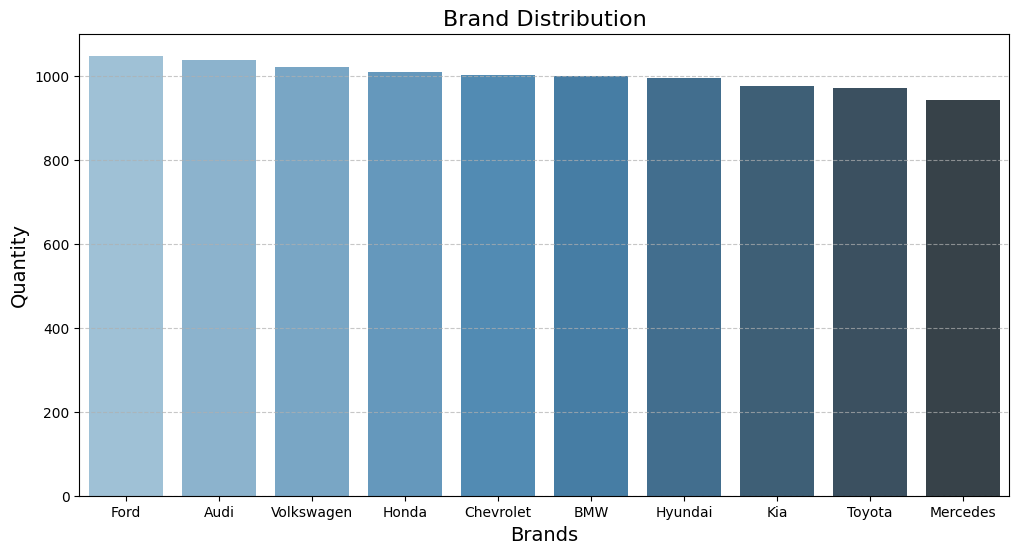

In [9]:
# Value count
brands_counts = car_df['Brand'].value_counts().reset_index()
brands_counts.columns = ['Brand', 'Count']

# Creating the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=brands_counts, x='Brand', y='Count', palette='Blues_d')

# Customization
plt.title('Brand Distribution', fontsize=16)
plt.xlabel('Brands', fontsize=14)
plt.ylabel('Quantity', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Analysis of Car Brand Distribution**

The results show the frequency of different car brands in the dataset. Ford has the highest count (1,048), followed closely by Audi (1,038) and Volkswagen (1,020). Honda, Chevrolet, and BMW also have similar frequencies, ranging between 999 and 1,009. Meanwhile, Hyundai, Kia, and Toyota have slightly lower counts, and Mercedes appears less frequently in comparison (942).

This distribution suggests that the dataset contains a relatively balanced representation of major car brands, with Ford leading slightly. However, it would be useful to explore whether these counts are influenced by factors such as region, model year, or price range. Further analysis could also help identify any potential biases in the dataset.

## **Model**

The Model variable represents the specific car models within each brand in the dataset. Analyzing its distribution helps identify the most and least common models, providing insights into market preferences and sales trends. This exploration also supports further analysis, such as model popularity, pricing variations, and performance comparisons within and across brands.

In [10]:
car_df['Model'].value_counts()

,count
Model,
Accord,365
Fiesta,363
Impala,355
5 Series,353
Tiguan,352
Focus,351
Q5,350
A4,350
Elantra,347


In [11]:
# percentage
model_counts = car_df['Model'].value_counts()

# Total occurrences
total = model_counts.sum()

# Calculating the proportion in percentage
model_proportions = (model_counts / total) * 100

# Displaying results to 2 decimal places
print(model_proportions.round(2))

Model
Accord      3.65
Fiesta      3.63
Impala      3.55
5 Series    3.53
Tiguan      3.52
Focus       3.51
Q5          3.50
A4          3.50
Elantra     3.47
Golf        3.39
A3          3.38
Optima      3.36
Civic       3.36
3 Series    3.35
Explorer    3.34
Malibu      3.33
Passat      3.29
Tucson      3.29
Rio         3.27
Corolla     3.25
RAV4        3.24
Camry       3.21
E-Class     3.21
Sonata      3.19
Equinox     3.15
GLA         3.15
Sportage    3.13
X5          3.11
CR-V        3.08
C-Class     3.06
Name: count, dtype: float64


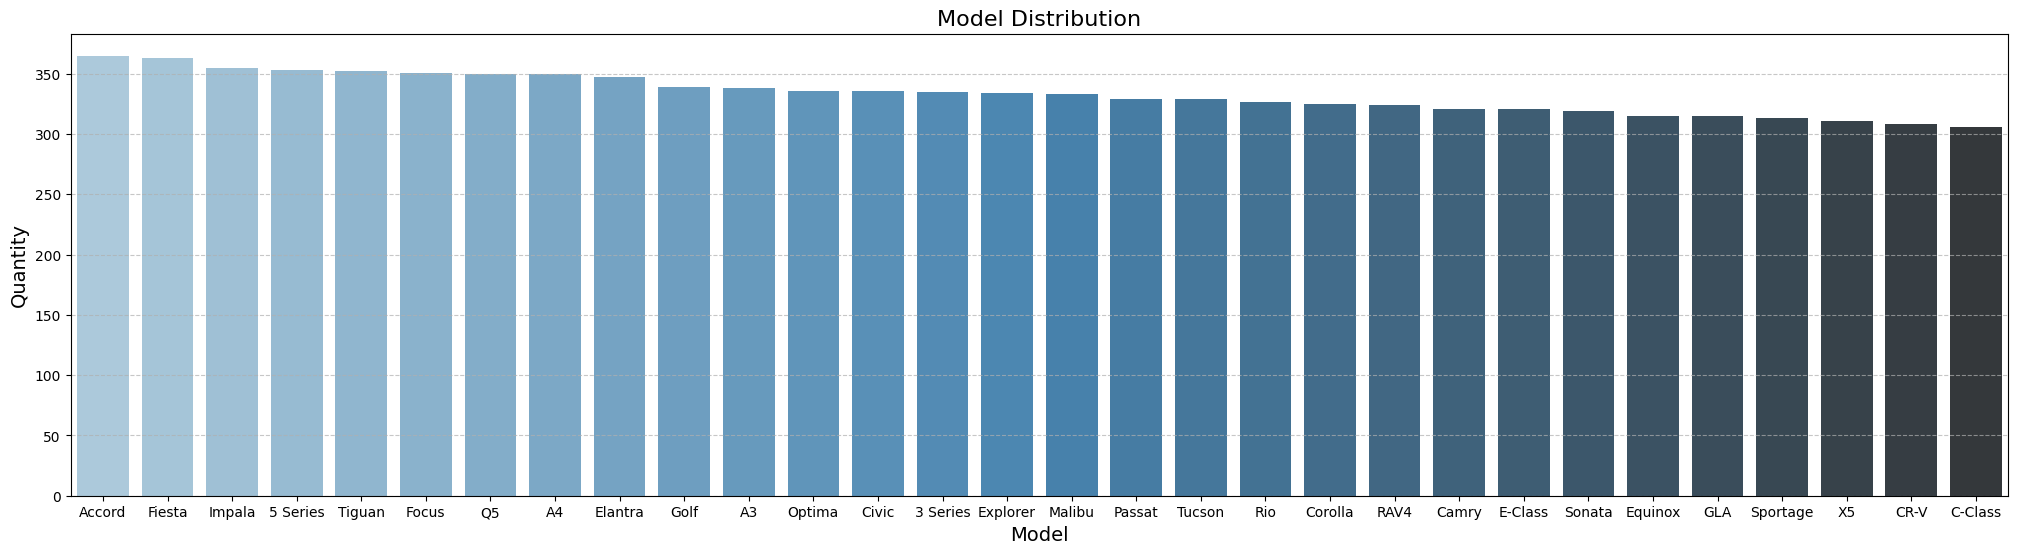

In [12]:
# Value count
model_counts = car_df['Model'].value_counts().reset_index()
model_counts.columns = ['Model', 'Count']

# Creating the bar chart
plt.figure(figsize=(25, 6))
sns.barplot(data=model_counts, x='Model', y='Count', palette='Blues_d')

# Customization
plt.title('Model Distribution', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Quantity', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Model Distribution**

The results indicate that the dataset contains a well-distributed variety of car models, with no extreme dominance by a single model. The **Accord** leads with 365 entries, closely followed by the **Fiesta** (363) and **Impala** (355). Other popular models, such as the **5 Series, Tiguan**, and **Focus**, also have similar frequencies, ranging between 351 and 353.

Several brands have multiple models appearing in the top rankings, such as Audi (Q5, A4, A3), BMW (5 Series, 3 Series, X5), Ford (Fiesta, Focus, Explorer), Toyota (Corolla, RAV4, Camry), and Chevrolet (Impala, Malibu, Equinox). This suggests a broad representation of different manufacturers rather than a dataset dominated by a single brand or model.

## **Year**

The Year variable represents the manufacturing year of each car in the dataset. Analyzing its distribution helps identify trends in the availability of newer versus older vehicles, providing insights into the dataset’s composition. This exploration can reveal patterns such as the dominance of recent models, the presence of older vehicles, and potential shifts in market demand over time. Additionally, understanding the distribution of Year is essential for further analyses, such as price trends and depreciation effects.

In [13]:
car_df['Year'].value_counts()

,count
Year,
2002,462
2011,449
2023,448
2012,437
2017,433
2005,431
2010,431
2007,430
2015,426


In [14]:
# percentage
year_counts = car_df['Year'].value_counts()

# Total occurrences
total = year_counts.sum()

# Calculating the proportion in percentage
year_proportions = (year_counts / total) * 100

# Displaying results to 2 decimal places
print(year_proportions.round(2))

Year
2002    4.62
2011    4.49
2023    4.48
2012    4.37
2017    4.33
2005    4.31
2010    4.31
2007    4.30
2015    4.26
2018    4.25
2013    4.22
2019    4.21
2014    4.17
2006    4.15
2020    4.15
2001    4.06
2009    3.99
2022    3.97
2016    3.95
2004    3.94
2000    3.93
2021    3.91
2008    3.82
2003    3.81
Name: count, dtype: float64


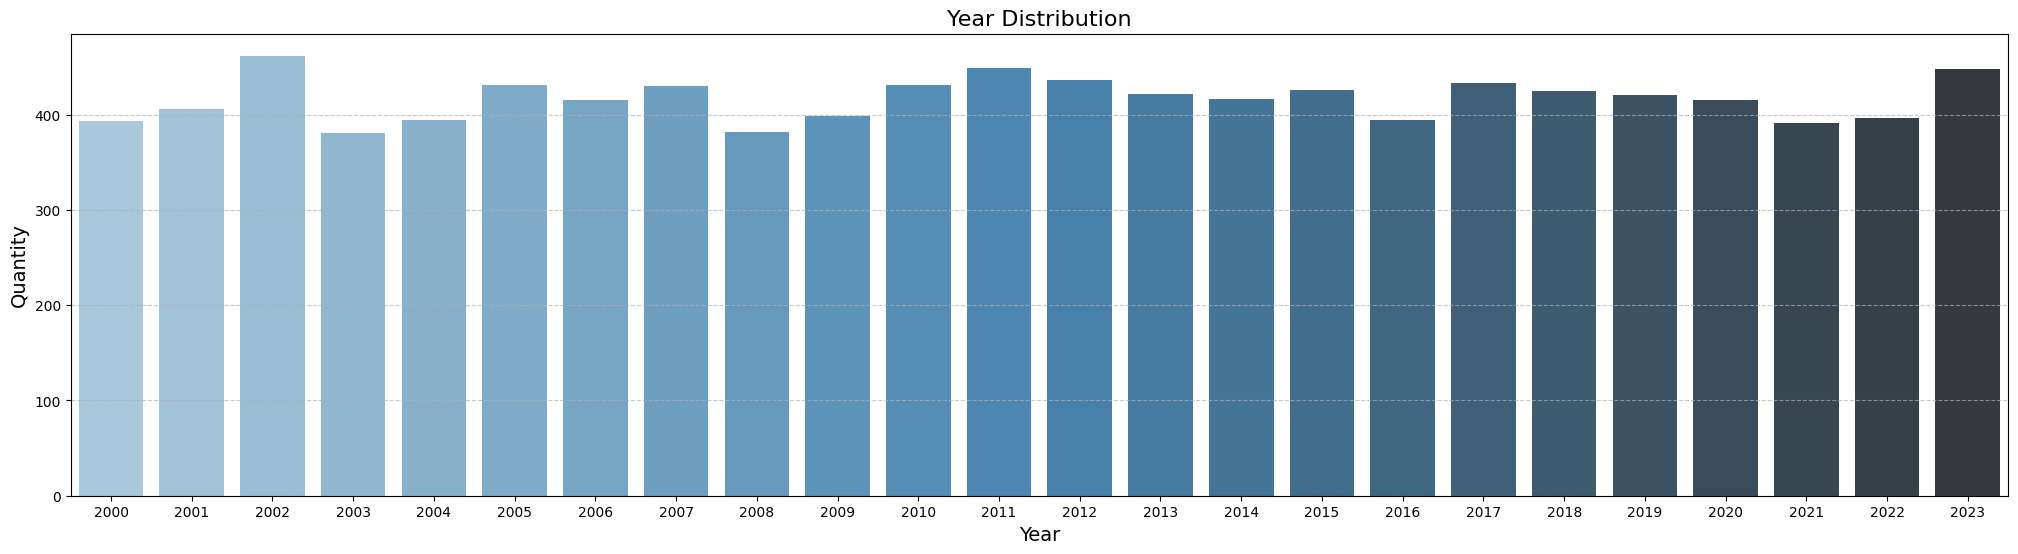

In [15]:
# Value count
year_counts = car_df['Year'].value_counts().reset_index()
year_counts.columns = ['Year', 'Count']

# Creating the bar chart
plt.figure(figsize=(25, 6))
sns.barplot(data=year_counts, x='Year', y='Count', palette='Blues_d')

# Customization
plt.title('Year Distribution', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Quantity', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Year Distribution**

The dataset includes a wide range of car manufacturing years, spanning from 2000 to 2023, with no extreme dominance of a specific year. The most frequent year is 2002 (462 cars), followed by 2011 (449) and 2023 (448), suggesting a mix of both older and recent models.

There is a relatively even distribution across the years, with a slight concentration in certain periods. Notably, newer models from 2020 to 2023 appear consistently, indicating that the dataset includes a significant portion of recent vehicles. At the same time, older models from the early 2000s are also well-represented, such as 2000 (393), 2001 (406), and 2002 (462).

This distribution suggests that the dataset covers a diverse range of vehicles, making it suitable for analyzing trends such as price depreciation, market demand for older versus newer models, and potential shifts in consumer preferences over time. Further analysis could explore how car prices vary by year or whether certain brands have a stronger presence in specific time periods.

## **Engine_Size**

The Engine_Size variable represents the engine displacement of each car in the dataset, typically measured in liters. Analyzing its distribution provides insights into the prevalence of different engine sizes, helping to understand market trends and consumer preferences. This exploration can reveal whether smaller, fuel-efficient engines dominate the dataset or if larger, high-performance engines are more common. Additionally, understanding Engine_Size is essential for further analyses, such as its relationship with fuel type, price, and vehicle performance.

In [16]:
car_df['Engine_Size'].value_counts()

,count
Engine_Size,
3.7,273
4.4,271
3.6,267
2.5,266
1.5,265
4.0,263
2.8,262
4.6,262
1.3,261


In [17]:
# percentage
engine_counts = car_df['Engine_Size'].value_counts()

# Total occurrences
total = engine_counts.sum()

# Calculating the proportion in percentage
engine_proportions = (engine_counts / total) * 100

# Displaying results to 2 decimal places
print(engine_proportions.round(2))

Engine_Size
3.7    2.73
4.4    2.71
3.6    2.67
2.5    2.66
1.5    2.65
4.0    2.63
2.8    2.62
4.6    2.62
1.3    2.61
2.2    2.59
1.4    2.59
2.6    2.59
1.6    2.58
2.0    2.58
4.1    2.57
3.5    2.56
3.1    2.54
3.3    2.54
4.7    2.53
3.8    2.53
2.9    2.53
1.2    2.51
4.5    2.50
2.7    2.50
3.2    2.49
1.8    2.49
4.9    2.47
1.7    2.46
3.4    2.43
4.3    2.42
2.4    2.40
3.0    2.36
3.9    2.36
2.1    2.34
4.2    2.32
1.9    2.32
4.8    2.31
1.1    2.30
2.3    2.23
1.0    1.13
5.0    1.03
Name: count, dtype: float64


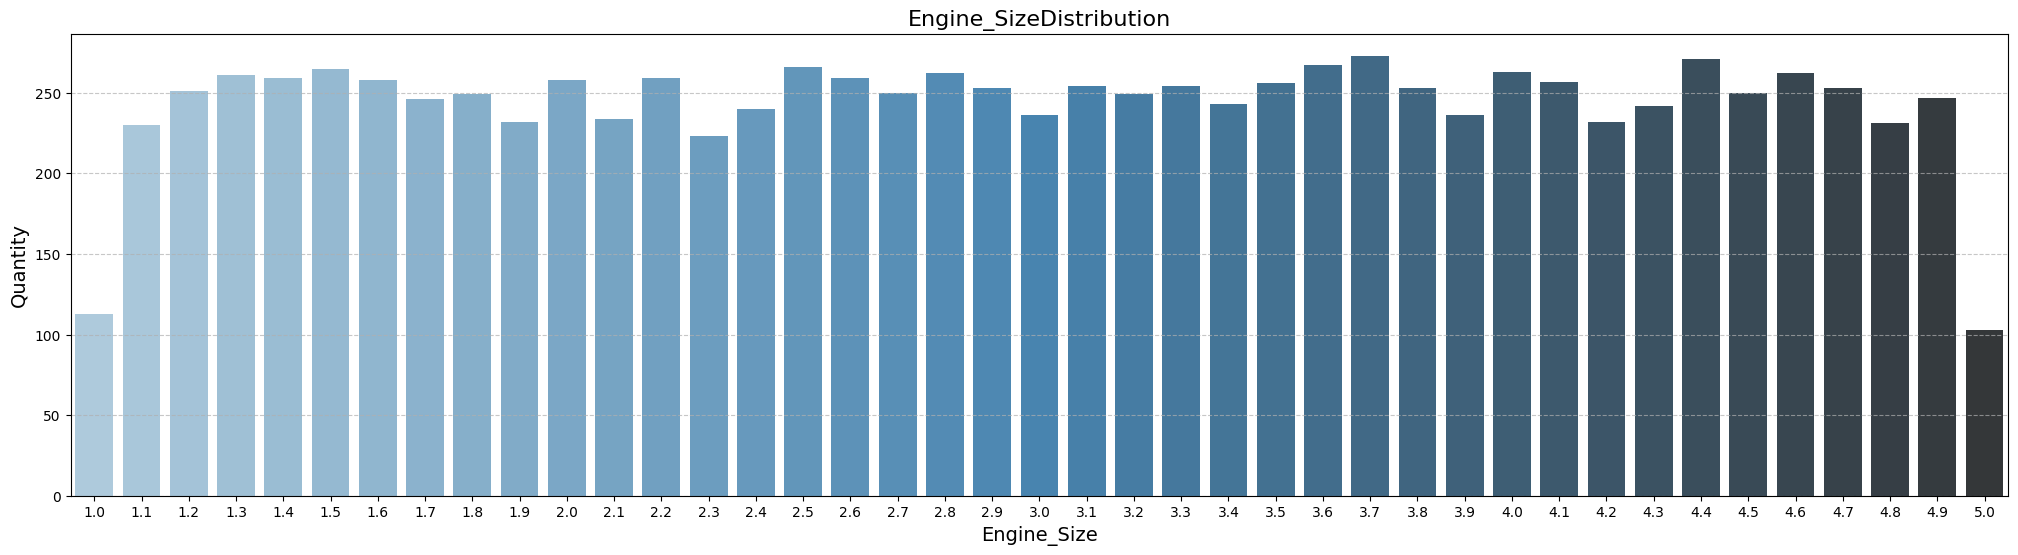

In [18]:
# Value count
engine_counts = car_df['Engine_Size'].value_counts().reset_index()
engine_counts.columns = ['Engine_Size', 'Count']

# Creating the bar chart
plt.figure(figsize=(25, 6))
sns.barplot(data=engine_counts, x='Engine_Size', y='Count', palette='Blues_d')

# Customization
plt.title('Engine_SizeDistribution', fontsize=16)
plt.xlabel('Engine_Size', fontsize=14)
plt.ylabel('Quantity', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Engine_Size Distribution**

The dataset contains a diverse range of engine sizes, spanning from 1.0L to 5.0L, with no extreme concentration in a specific size. The most frequent engine size is 3.7L (273 cars), followed closely by 4.4L (271) and 3.6L (267). This suggests a relatively balanced distribution across different engine categories.

Smaller engines, such as 1.0L (113) and 1.1L (230), appear less frequently, while mid-range sizes between 1.5L and 3.0L are well-represented, indicating a mix of fuel-efficient and performance-oriented vehicles. Larger engines, including 4.0L to 5.0L, are also present in significant numbers, suggesting the dataset includes a variety of high-performance and luxury vehicles.

This distribution indicates that the dataset covers a broad spectrum of vehicle types, from compact, fuel-efficient cars to high-performance and larger displacement vehicles. Further analysis could explore how Engine_Size correlates with other factors such as fuel type, price, and vehicle brand to identify patterns in consumer preferences and market segmentation.

## **Fuel Type**

The Fuel_Type variable represents the type of fuel used by each car in the dataset. Analyzing its distribution provides insights into the prevalence of different fuel types, such as petrol, diesel, hybrid, or electric vehicles. This exploration helps identify market trends, shifts in consumer preferences, and the potential impact of fuel efficiency and environmental concerns on car sales. Additionally, understanding Fuel_Type is essential for further analyses, such as its relationship with engine size, price, and overall vehicle performance.

In [19]:
car_df['Fuel_Type'].value_counts()

,count
Fuel_Type,
Electric,2625
Diesel,2512
Hybrid,2453
Petrol,2410


In [20]:
# percentage
fuel_counts = car_df['Fuel_Type'].value_counts()

# Total occurrences
total = fuel_counts.sum()

# Calculating the proportion in percentage
fuel_proportions = (fuel_counts / total) * 100

# Displaying results to 2 decimal places
print(fuel_proportions.round(2))

Fuel_Type
Electric    26.25
Diesel      25.12
Hybrid      24.53
Petrol      24.10
Name: count, dtype: float64


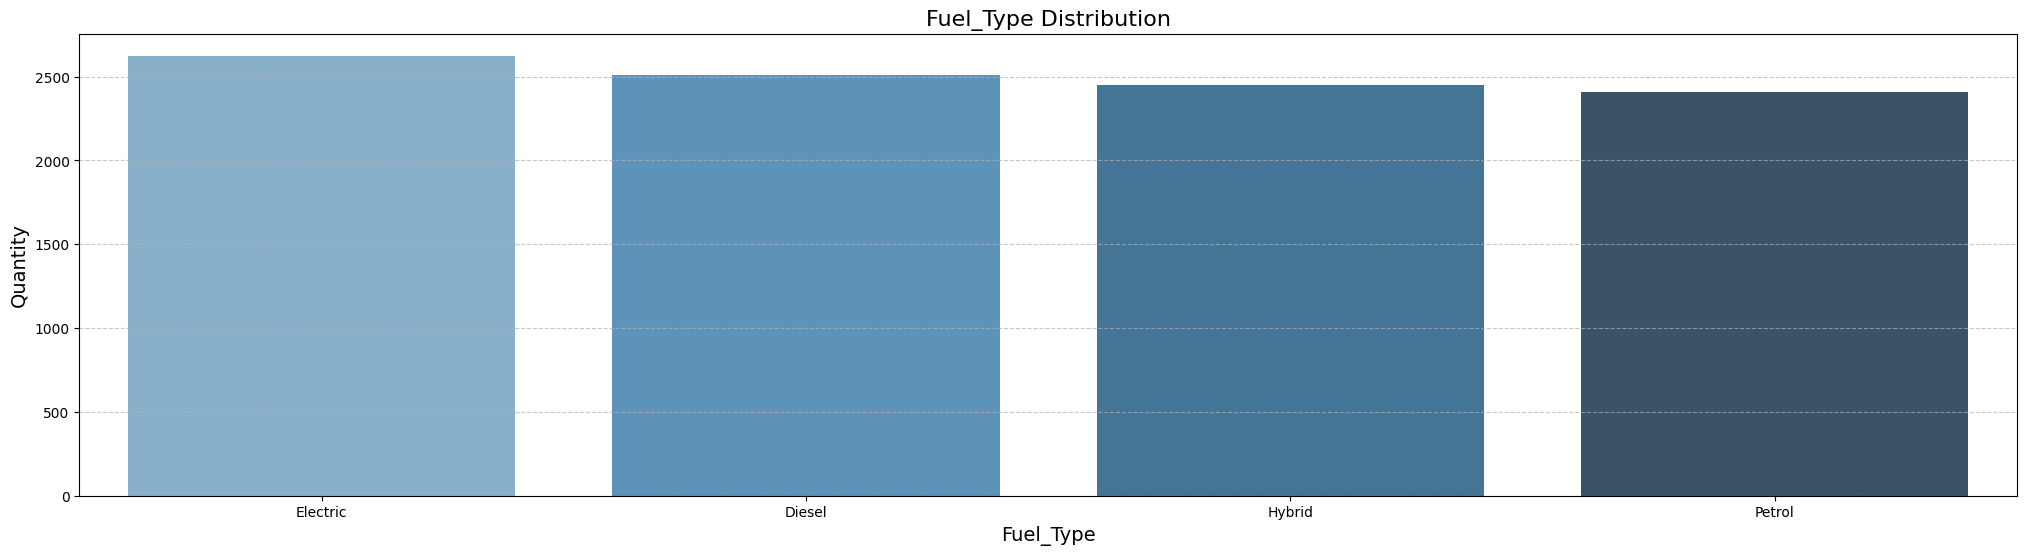

In [21]:
# Value count
fuel_counts = car_df['Fuel_Type'].value_counts().reset_index()
fuel_counts.columns = ['Fuel_Type', 'Count']

# Creating the bar chart
plt.figure(figsize=(25, 6))
sns.barplot(data=fuel_counts, x='Fuel_Type', y='Count', palette='Blues_d')

# Customization
plt.title('Fuel_Type Distribution', fontsize=16)
plt.xlabel('Fuel_Type', fontsize=14)
plt.ylabel('Quantity', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Fuel_Type Distribution**

The dataset shows a well-balanced distribution among different fuel types, with no single category overwhelmingly dominating. Electric vehicles (2,625 cars) are the most common, indicating a strong presence of environmentally friendly options. This could reflect the growing market shift towards sustainable transportation and increased adoption of EVs.

Diesel (2,512 cars) and hybrid vehicles (2,453 cars) are also well-represented, suggesting a diverse range of fuel-efficient and performance-oriented options. Diesel engines are often preferred for their fuel economy and long-distance capabilities, while hybrids offer a balance between fuel efficiency and reduced emissions.

Petrol vehicles (2,410 cars), while slightly less common than the other categories, still make up a significant portion of the dataset. This suggests that traditional internal combustion engine (ICE) cars remain relevant despite the rise of electric and hybrid alternatives.

This distribution highlights the evolving automotive landscape, where electric and hybrid vehicles are gaining traction, but diesel and petrol cars still hold a considerable share. Further analysis could explore how Fuel_Type interacts with variables like Price, Engine_Size, and Year to identify trends in fuel efficiency, market demand, and technological advancements over time.

## **Transmission**

The Transmission variable represents the type of transmission system used in each vehicle, such as manual, automatic, or semi-automatic. Understanding its distribution provides insights into consumer preferences, driving habits, and technological advancements in the automotive industry. Analyzing this variable can help identify trends in transmission adoption, such as the growing preference for automatic transmissions over manual ones. Additionally, Transmission is an important factor influencing vehicle performance, fuel efficiency, and pricing, making it a key aspect of further analysis.

In [22]:
car_df['Transmission'].value_counts()

,count
Transmission,
Manual,3372
Automatic,3317
Semi-Automatic,3311


In [23]:
# percentage
transmission_counts = car_df['Fuel_Type'].value_counts()

# Total occurrences
total = transmission_counts.sum()

# Calculating the proportion in percentage
transmission_proportions = (transmission_counts / total) * 100

# Displaying results to 2 decimal places
print(transmission_proportions.round(2))

Fuel_Type
Electric    26.25
Diesel      25.12
Hybrid      24.53
Petrol      24.10
Name: count, dtype: float64


**Transmission Distribution**

The dataset shows a nearly even distribution among the three transmission types: Manual (3,372 cars), Automatic (3,317 cars), and Semi-Automatic (3,311 cars). This suggests that no single transmission type overwhelmingly dominates the dataset, reflecting a diverse range of consumer preferences and vehicle offerings.

The manual transmission category has a slight lead, indicating that traditional manual cars are still relevant, possibly due to their affordability, fuel efficiency, and appeal to driving enthusiasts. However, the automatic and semi-automatic transmissions are nearly as common, which aligns with the broader industry trend favoring convenience and ease of use, particularly in urban and high-traffic environments.

## **Mileage**

The Mileage variable represents the total distance a car has traveled, typically measured in miles or kilometers. This is a crucial factor in assessing a vehicle’s condition, depreciation, and overall value. Lower mileage often indicates less wear and tear, making a car more desirable, while higher mileage may suggest extensive usage, potentially affecting maintenance costs and longevity.

In [24]:
car_df['Mileage'].describe()

,Mileage
count,10000.000000
mean,149239.111800
std,86322.348957
min,25.000000
25%,74649.250000
50%,149587.000000
75%,223577.500000
max,299947.000000


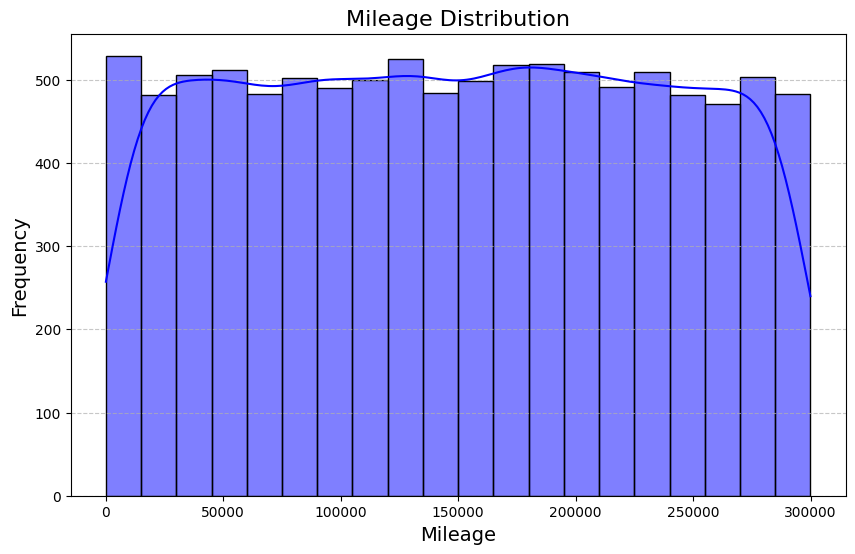

In [25]:
# Criando o histograma
plt.figure(figsize=(10, 6))
sns.histplot(car_df['Mileage'], bins=20, kde=True, color='blue')

# Personalização
plt.title('Mileage Distribution', fontsize=16)
plt.xlabel('Mileage', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Mileage Distribution**

The dataset consists of 10,000 vehicles, with mileage values ranging from 25 to 299,947. The mean mileage is approximately 149,239, indicating that, on average, the vehicles in this dataset have been driven extensively. However, the standard deviation of 86,322 suggests significant variability, meaning there is a wide range of vehicle usage.

**Examining the quartiles:**

**25% of the cars have a mileage of 74,649 or less**, indicating relatively low usage.

**50% of the cars (median) have a mileage of 149,587**, which aligns closely with the mean, suggesting a balanced distribution.

**75% of the cars have a mileage of 223,577 or less,** while the highest mileage reaches 299,947, showing that a considerable number of vehicles have been heavily used.

This distribution suggests that the dataset includes both low-mileage and high-mileage vehicles, making it useful for analyzing how mileage impacts pricing, vehicle age, and fuel efficiency. Further analysis could explore the relationship between Mileage and other factors such as Price, Year, and Fuel_Type to uncover patterns in vehicle depreciation and consumer preferences.

## **Doors**

The Doors variable represents the number of doors a vehicle has, typically ranging from two to five. This attribute is essential in categorizing vehicles based on their design, functionality, and target consumer preferences. Cars with two doors are often associated with sports cars or coupes, emphasizing style and performance. In contrast, vehicles with four or five doors—such as sedans, SUVs, and hatchbacks—are generally favored for their practicality, offering easier access and more passenger space.

In [26]:
car_df['Doors'].value_counts()

,count
Doors,
3,2575
4,2514
5,2456
2,2455


In [27]:
# percentage
doors_counts = car_df['Doors'].value_counts()

# Total occurrences
total = doors_counts.sum()

# Calculating the proportion in percentage
doors_proportions = (doors_counts / total) * 100

# Displaying results to 2 decimal places
print(doors_proportions.round(2))

Doors
3    25.75
4    25.14
5    24.56
2    24.55
Name: count, dtype: float64


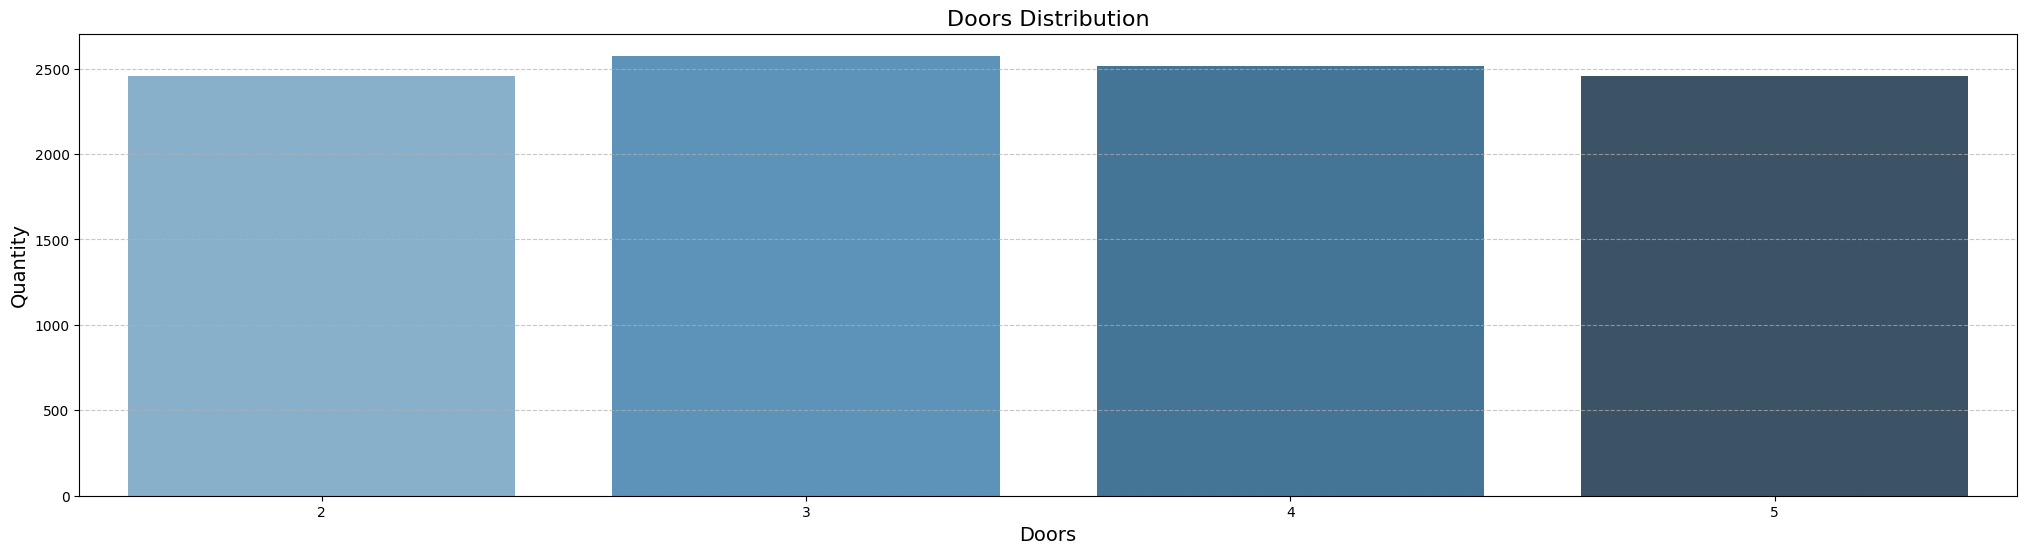

In [28]:
# Value count
door_counts = car_df['Doors'].value_counts().reset_index()
door_counts.columns = ['Doors', 'Count']

# Creating the bar chart
plt.figure(figsize=(25, 6))
sns.barplot(data=door_counts, x='Doors', y='Count', palette='Blues_d')

# Customization
plt.title('Doors Distribution', fontsize=16)
plt.xlabel('Doors', fontsize=14)
plt.ylabel('Quantity', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Analysis of the Doors Distribution**

The dataset reveals a fairly balanced distribution among different door configurations:

3-door vehicles are the most common, with 2,575 cars, likely consisting of hatchbacks and compact cars that prioritize a mix of practicality and sportiness.

4-door vehicles follow closely with 2,514 cars, which are typically sedans and some SUVs, offering a balance between accessibility and comfort.

5-door vehicles (2,456 cars) include hatchbacks, SUVs, and minivans, which emphasize functionality and spaciousness.

2-door vehicles (2,455 cars) are the least common but still well-represented, mostly consisting of coupes and sports cars that prioritize style and performance.

## **Owner_Count**

The Owner_Count variable represents the number of previous owners a vehicle has had. This is a crucial factor in assessing a car’s history, potential wear and tear, and overall value. Vehicles with fewer previous owners are often perceived as better maintained and more desirable in the resale market, while cars with multiple owners may indicate a higher likelihood of mechanical issues or inconsistent maintenance.

In [29]:
car_df['Owner_Count'].describe()

,Owner_Count
count,10000.000000
mean,2.991100
std,1.422682
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


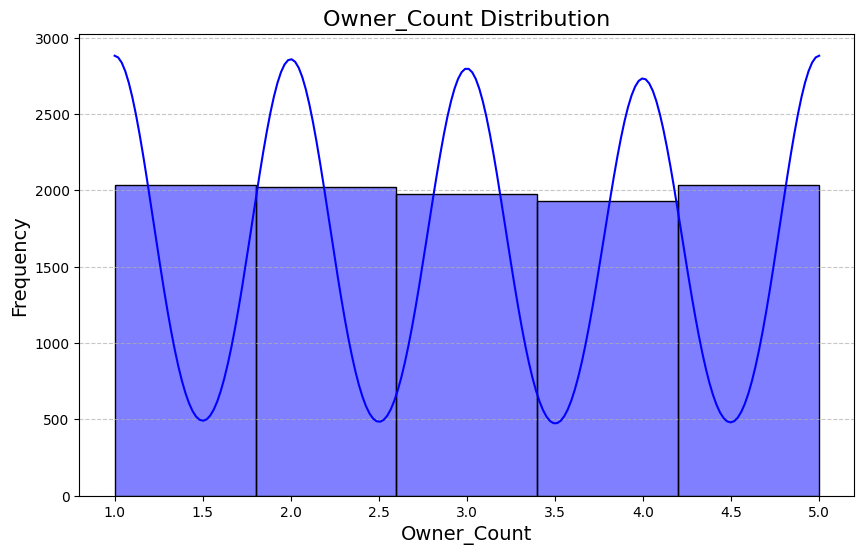

In [30]:
# Criando o histograma
plt.figure(figsize=(10, 6))
sns.histplot(car_df['Owner_Count'], bins=5, kde=True, color='blue')

# Personalização
plt.title('Owner_Count Distribution', fontsize=16)
plt.xlabel('Owner_Count', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Analysis of the Owner_Count Distribution**

The dataset consists of 10,000 vehicles, with the number of previous owners ranging from 1 to 5. The mean owner count is approximately 2.99, suggesting that, on average, most vehicles have had about three previous owners.

Examining the quartiles:

25% of the vehicles had two or fewer owners, indicating a segment of relatively new or well-maintained cars.

50% of the vehicles (median) had three owners, aligning closely with the mean, suggesting that three owners is the most typical case.

75% of the vehicles had four or fewer owners, while the maximum reaches five owners, indicating that a portion of the dataset consists of vehicles that have changed hands multiple times.

The standard deviation of 1.42 suggests a moderate spread in ownership history, meaning that while some cars have had only one or two owners, a significant portion has had multiple owners. This could indicate a mix of well-maintained, single-owner cars and frequently resold vehicles.

## **Price**

The Price variable represents the selling price of vehicles in the dataset. It is one of the most critical factors influencing consumer decisions, as it reflects a combination of various attributes such as brand reputation, model popularity, vehicle condition, mileage, engine size, and ownership history.

Analyzing Price can help identify trends in the automotive market, such as which vehicle types hold their value better and how factors like age, mileage, and fuel type impact pricing. Additionally, studying its distribution can provide insights into the range of prices available and highlight the presence of luxury, economy, and budget-friendly vehicles in the dataset.

In [31]:
car_df['Price'].describe()

,Price
count,10000.00000
mean,8852.96440
std,3112.59681
min,2000.00000
25%,6646.00000
50%,8858.50000
75%,11086.50000
max,18301.00000


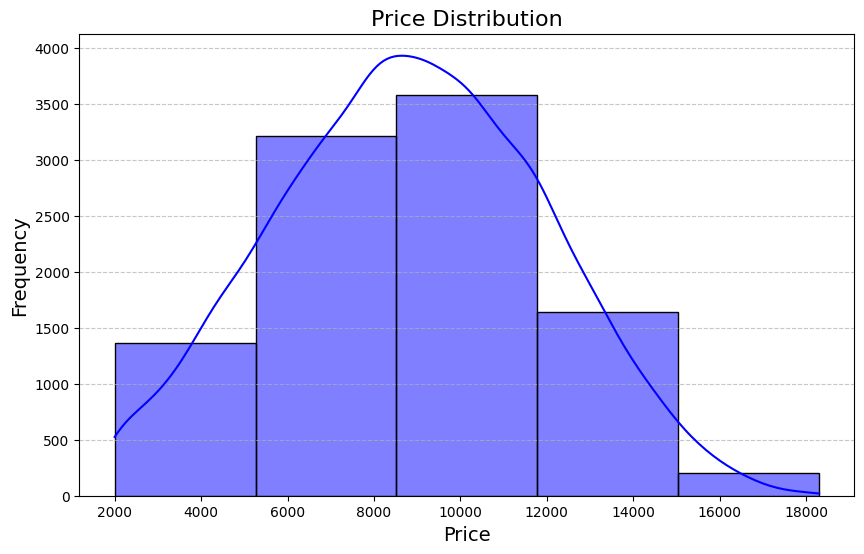

In [32]:
# Criando o histograma
plt.figure(figsize=(10, 6))
sns.histplot(car_df['Price'], bins=5, kde=True, color='blue')

# Personalização
plt.title('Price Distribution', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Price Distribution**

The dataset contains 10,000 vehicles, with prices ranging from 2,000 to 18,301. The mean price is approximately $8,852, indicating that, on average, most vehicles in the dataset are in a mid-range pricing category.

Examining the quartiles:

25% of the vehicles are priced at $6,646 or lower, suggesting an affordable segment, likely composed of older or higher-mileage cars.

50% of the vehicles (median) are priced around $8,858, meaning that half of the dataset consists of vehicles within this range or cheaper.

75% of the vehicles are priced at $11,086 or lower, indicating that only the top 25% of vehicles belong to the higher-end segment of the dataset.

The standard deviation of 3,112 suggests a moderate variation in prices, meaning there is a mix of budget-friendly and more expensive vehicles. The maximum price of $18,301 indicates the presence of higher-value cars, possibly luxury models or newer vehicles with advanced features.

# **Bivariate variable (Qualitativy Variables)**

## **Brand x Fuel_type**

To gain deeper insights into the dataset, I will perform a bivariate analysis of qualitative variables. This approach helps identify relationships between categorical features, revealing patterns that may not be evident in a univariate analysis.

By examining how two qualitative variables interact, we can uncover trends, dependencies, and potential correlations. For instance, analyzing the relationship between Brand and Fuel_Type or Transmission and Owner_Count can provide valuable insights into consumer preferences and market trends.

This analysis is essential for understanding how different categorical factors influence each other, supporting data-driven decision-making and uncovering meaningful patterns in the dataset.



Understanding the relationship between car brands and fuel types is crucial in identifying market trends and manufacturer preferences. This analysis explores how different brands distribute their vehicles across Diesel, Electric, Hybrid, and Petrol fuel types. By examining this association, we can gain insights into which brands are leading in electric and hybrid adoption, as well as those still relying on traditional fuel sources. To achieve this, we will use a contingency table, a bar chart visualization, and statistical tests such as the Chi-Square test to determine whether there is a significant relationship between these variables.

In [33]:
# Creating the contingency table with totals
contingency_table = pd.crosstab(car_df['Brand'], car_df['Fuel_Type'], margins=True, margins_name="Total")

# Converting to percentages (by line)
contingency_table_percentage = contingency_table.div(contingency_table.loc["Total"], axis=1) * 100

# Displaying the table with totals and percentages
print("Contingency Table with Totals:")
print(contingency_table)

Contingency Table with Totals:
Fuel_Type   Diesel  Electric  Hybrid  Petrol  Total
Brand                                              
Audi           248       262     280     248   1038
BMW            245       279     217     258    999
Chevrolet      260       250     257     236   1003
Ford           264       278     258     248   1048
Honda          248       265     256     240   1009
Hyundai        250       255     253     237    995
Kia            260       244     242     230    976
Mercedes       251       249     216     226    942
Toyota         246       268     224     232    970
Volkswagen     240       275     250     255   1020
Total         2512      2625    2453    2410  10000


**Insights from the contingency table analysis of Brand and Fuel_Type:**

1️⃣ Fairly Even Distribution Across Fuel Types

The total number of vehicles using Diesel (2512), Electric (2625), Hybrid (2453), and Petrol (2410) is relatively balanced, with Electric being the most common fuel type.

This suggests a diverse market presence for different fuel technologies.

2️⃣ No Extreme Brand Preferences for Fuel Types

Each brand has a relatively even distribution across fuel types, meaning no brand dominates a particular fuel type significantly.

For example, Audi, Ford, BMW, and Toyota all have comparable proportions of Diesel, Electric, Hybrid, and Petrol cars.

3️⃣ Electric Vehicles Are Popular Across Multiple Brands

Brands like Audi (262), BMW (279), Ford (278), Toyota (268), and Volkswagen (275) have higher numbers of electric cars, suggesting their active investment in EVs.

This could indicate a shift towards sustainability and eco-friendly alternatives in their lineup.

4️⃣ Diesel Cars Are Still Present Across All Brands

Diesel vehicles remain relatively common across brands, with numbers comparable to other fuel types.

This suggests diesel is still a viable option, though it may decline as electric and hybrid adoption increases.

5️⃣ Slightly Lower Representation of Petrol Vehicles in Some Brands

Mercedes (226) and Kia (230) have slightly lower numbers of petrol cars compared to their hybrid and electric alternatives.

This may suggest a strategic shift towards hybrid/electric models in these brands.

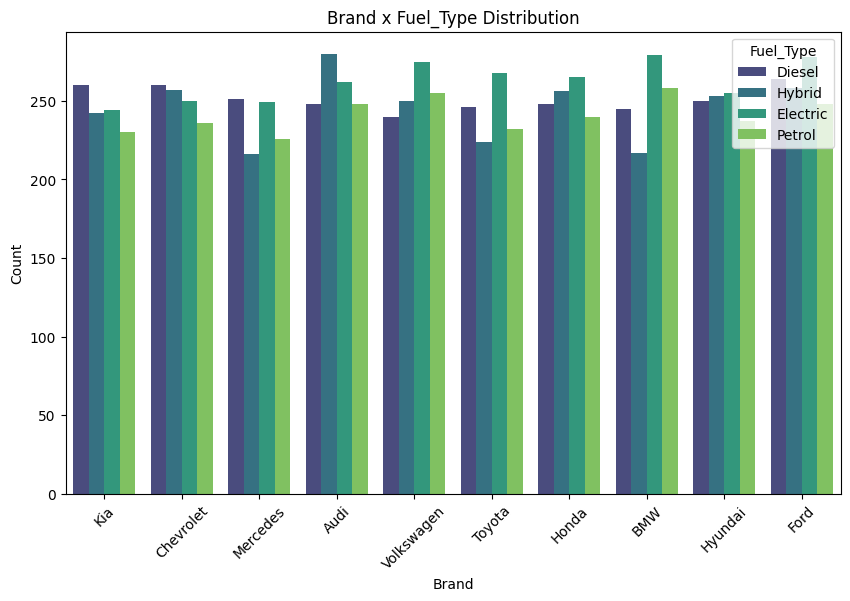

In [34]:
# Creating the clustered bar chart
plt.figure(figsize=(10, 6))
sns.countplot(data=car_df, x="Brand", hue="Fuel_Type", palette="viridis")

# Chart adjustments
plt.title("Brand x Fuel_Type Distribution")
plt.xlabel("Brand")
plt.ylabel("Count")
plt.legend(title="Fuel_Type")
plt.xticks(rotation=45)  # Rotates labels on the x-axis for better viewing
plt.show()

**Chi Square Test**

In [35]:
# Apply Chi Square Test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Show the results
print(f"Qui-quadrado: {chi2:.4f}")
print(f"Valor p: {p:.4f}")
print(f"Graus de liberdade: {dof}")
print("Tabela esperada:")
print(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))

# Interpret the result
if p < 0.05:
    print("There is sufficient evidence to suggest an association between Brand and Fuel_Type.")
else:
    print("There is insufficient evidence to suggest an association between Brand and Fuel_Type.")

Qui-quadrado: 18.4748
Valor p: 0.9986
Graus de liberdade: 40
Tabela esperada:
Fuel_Type      Diesel   Electric     Hybrid    Petrol    Total
Brand                                                         
Audi         260.7456   272.4750   254.6214   250.158   1038.0
BMW          250.9488   262.2375   245.0547   240.759    999.0
Chevrolet    251.9536   263.2875   246.0359   241.723   1003.0
Ford         263.2576   275.1000   257.0744   252.568   1048.0
Honda        253.4608   264.8625   247.5077   243.169   1009.0
Hyundai      249.9440   261.1875   244.0735   239.795    995.0
Kia          245.1712   256.2000   239.4128   235.216    976.0
Mercedes     236.6304   247.2750   231.0726   227.022    942.0
Toyota       243.6640   254.6250   237.9410   233.770    970.0
Volkswagen   256.2240   267.7500   250.2060   245.820   1020.0
Total       2512.0000  2625.0000  2453.0000  2410.000  10000.0
There is insufficient evidence to suggest an association between Brand and Fuel_Type.


**Based on the Chi-square test results:**

The Chi-square statistic is 18.4748, with 40 degrees of freedom.
The p-value is 0.9986, which is significantly higher than the standard significance level of 0.05.

Conclusion:

Since the p-value is much greater than 0.05, we fail to reject the null hypothesis. This means there is insufficient statistical evidence to suggest a significant association between Brand and Fuel_Type.

In other words, the distribution of fuel types across different car brands appears to be independent, meaning that no particular brand is strongly associated with a specific fuel type.

In [36]:
# Criar a tabela de contingência
contingency_table = pd.crosstab(car_df['Brand'], car_df['Fuel_Type'])

# Realizar o teste do qui-quadrado
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Calcular o V de Cramer
n = contingency_table.sum().sum()  # Total de observações
min_dim = min(contingency_table.shape) - 1  # Menor dimensão - 1
cramers_v = np.sqrt(chi2 / (n * min_dim))

print(f"Qui-quadrado: {chi2:.4f}")
print(f"Valor p: {p:.4f}")
print(f"Grau de liberdade: {dof}")
print(f"V de Cramer: {cramers_v:.4f}")

Qui-quadrado: 18.4748
Valor p: 0.8883
Grau de liberdade: 27
V de Cramer: 0.0248


**Conclusions from the Chi-Square Test and Cramér’s V**

1️⃣ No Significant Association

The p-value (0.8883) is much higher than 0.05, meaning we fail to reject the null hypothesis. This confirms that there is no statistically significant relationship between Brand and Fuel_Type.

2️⃣ Extremely Weak Association

The Cramér’s V value (0.0248) is very close to 0, indicating that the relationship between the two variables is almost nonexistent.
Typically, a Cramér’s V value below 0.1 suggests a very weak or no association between the categories.

**Final Interpretation**

These results strongly suggest that car brands do not have a specific preference for any particular fuel type in this dataset. The distribution of fuel types appears to be independent of the brand, meaning that fuel type is not a key differentiator among brands in this dataset.

(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0.5, 0, 'Diesel'),
  Text(1.5, 0, 'Electric'),
  Text(2.5, 0, 'Hybrid'),
  Text(3.5, 0, 'Petrol')])

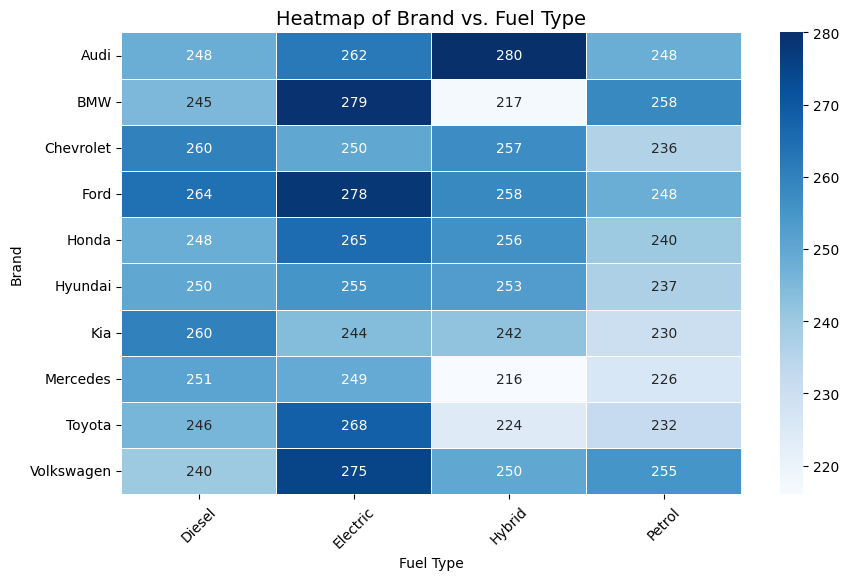

In [37]:
# Criando a tabela de contingência
contingency_table = pd.crosstab(car_df['Brand'], car_df['Fuel_Type'])

# Criando o heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap="Blues", fmt="d", linewidths=0.5)

# Ajustando o título e os rótulos
plt.title("Heatmap of Brand vs. Fuel Type", fontsize=14)
plt.xlabel("Fuel Type")
plt.ylabel("Brand")
plt.xticks(rotation=45)  # Rotacionando os rótulos do eixo X para melhor visualização

## **Brand and Transmission**

In this analysis, we explore the relationship between Brand and Transmission type to identify potential patterns or associations. Understanding how different car brands distribute among manual, automatic, and semi-automatic transmissions can provide insights into manufacturers' preferences and market trends. By constructing a contingency table, performing a chi-square test, and calculating Cramér’s V, we aim to determine whether there is a significant association between these categorical variables.

In [38]:
# Creating the contingency table with totals
contingency_table = pd.crosstab(car_df['Brand'], car_df['Transmission'], margins=True, margins_name="Total")

# Converting to percentages (by line)
contingency_table_percentage = contingency_table.div(contingency_table.loc["Total"], axis=1) * 100

# Displaying the table with totals and percentages
print("Contingency Table with Totals:")
print(contingency_table)

Contingency Table with Totals:
Transmission  Automatic  Manual  Semi-Automatic  Total
Brand                                                 
Audi                343     353             342   1038
BMW                 340     325             334    999
Chevrolet           357     330             316   1003
Ford                347     337             364   1048
Honda               327     356             326   1009
Hyundai             330     336             329    995
Kia                 324     332             320    976
Mercedes            314     337             291    942
Toyota              292     326             352    970
Volkswagen          343     340             337   1020
Total              3317    3372            3311  10000


**Brand and Transmission:**

Relatively Even Distribution: The distribution of transmission types across brands is fairly balanced, with Manual (3372), Automatic (3317), and Semi-Automatic (3311) being used in similar proportions. No single transmission type overwhelmingly dominates.

Brand Preferences Vary Slightly: Some brands show slight preferences for specific transmission types. For example:

Chevrolet has a slightly higher count of Automatic transmissions (357).

Ford has the highest number of Semi-Automatic transmissions (364).

Honda and Audi have a relatively even split across all transmission types.

No Clear Dominance by Transmission Type: Unlike some vehicle markets where a single transmission type is dominant, here we observe that all three types are used across brands with no extreme variations.

Potential Further Analysis: A chi-square test can help determine if the observed differences are statistically significant, or if they are simply due to chance. If significant, this could indicate that certain brands have a stronger association with specific transmission types.

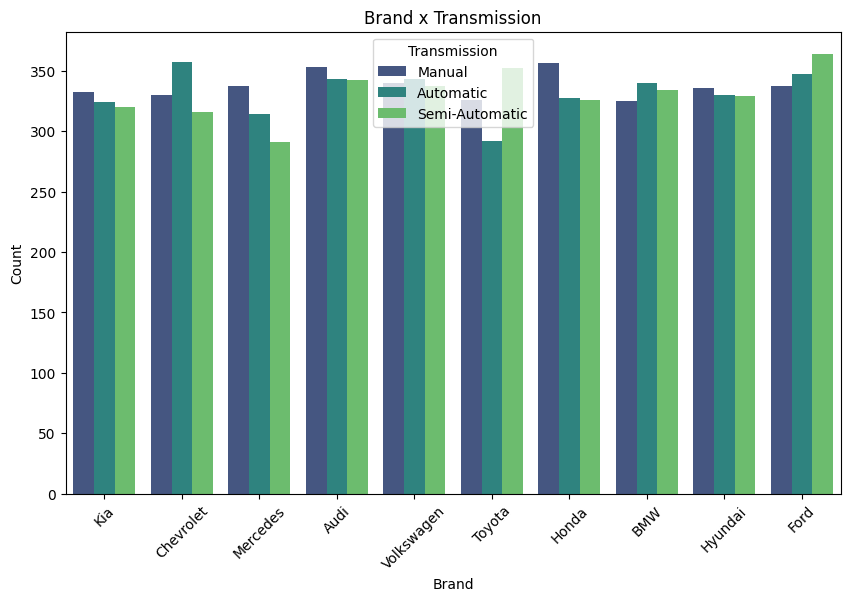

In [39]:
# Creating the clustered bar chart
plt.figure(figsize=(10, 6))
sns.countplot(data=car_df, x="Brand", hue="Transmission", palette="viridis")

# Chart adjustments
plt.title("Brand x Transmission")
plt.xlabel("Brand")
plt.ylabel("Count")
plt.legend(title="Transmission")
plt.xticks(rotation=45)  # Rotates labels on the x-axis for better viewing
plt.show()

In [40]:
# Apply Chi Square Test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Show the results
print(f"Qui-quadrado: {chi2:.4f}")
print(f"Valor p: {p:.4f}")
print(f"Graus de liberdade: {dof}")
print("Tabela esperada:")
print(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))

# Interpret the result
if p < 0.05:
    print("There is sufficient evidence to suggest an association between Brand and Fuel_Type.")
else:
    print("There is insufficient evidence to suggest an association between Brand and Fuel_Type.")

Qui-quadrado: 14.6348
Valor p: 0.9916
Graus de liberdade: 30
Tabela esperada:
Transmission  Automatic     Manual  Semi-Automatic    Total
Brand                                                      
Audi           344.3046   350.0136        343.6818   1038.0
BMW            331.3683   336.8628        330.7689    999.0
Chevrolet      332.6951   338.2116        332.0933   1003.0
Ford           347.6216   353.3856        346.9928   1048.0
Honda          334.6853   340.2348        334.0799   1009.0
Hyundai        330.0415   335.5140        329.4445    995.0
Kia            323.7392   329.1072        323.1536    976.0
Mercedes       312.4614   317.6424        311.8962    942.0
Toyota         321.7490   327.0840        321.1670    970.0
Volkswagen     338.3340   343.9440        337.7220   1020.0
Total         3317.0000  3372.0000       3311.0000  10000.0
There is insufficient evidence to suggest an association between Brand and Fuel_Type.


**Based on the Chi-square test results:**

Based on the results of the chi-square test for the association between Brand and Transmission, the following conclusions can be made:

No Significant Association: The chi-square statistic is 14.6348, and the p-value is 0.9916, which is much higher than the typical significance level of 0.05. This indicates that there is insufficient evidence to suggest a statistically significant association between Brand and Transmission. In other words, the transmission type does not appear to be strongly linked to specific brands in this dataset.

Expected Frequencies vs Observed Frequencies: The expected frequencies for each combination of Brand and Transmission are close to the observed frequencies, as shown in the contingency table. This reinforces the finding that there is no strong relationship between the two variables, since the actual distribution of transmission types across brands closely matches what would be expected if there were no association.

Independence of Variables: The lack of a significant result suggests that Brand and Transmission are likely independent of each other. There doesn't seem to be a pattern of one influencing the other.

In [41]:
# Criar a tabela de contingência
contingency_table = pd.crosstab(car_df['Brand'], car_df['Transmission'])

# Realizar o teste do qui-quadrado
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Calcular o V de Cramer
n = contingency_table.sum().sum()  # Total de observações
min_dim = min(contingency_table.shape) - 1  # Menor dimensão - 1
cramers_v = np.sqrt(chi2 / (n * min_dim))

print(f"Qui-quadrado: {chi2:.4f}")
print(f"Valor p: {p:.4f}")
print(f"Grau de liberdade: {dof}")
print(f"V de Cramer: {cramers_v:.4f}")

Qui-quadrado: 14.6348
Valor p: 0.6869
Grau de liberdade: 18
V de Cramer: 0.0271


**Conclusions from the Chi-Square Test and Cramér’s V**

Cramér's V Interpretation: The value of Cramér's V is 0.0271, which is a very small value. Cramér's V is a measure of the strength of association between two categorical variables. Values closer to 0 indicate a very weak association, while values closer to 1 suggest a strong association. In this case, a value of 0.0271 indicates that the relationship between Brand and Transmission is extremely weak, further supporting the result from the chi-square test.

Insufficient Evidence of Association: Both the chi-square statistic (14.6348) and the p-value (0.6869) indicate no significant relationship between the two variables. The Cramér's V reinforces this finding by showing a minimal level of association, confirming that Brand and Transmission are likely independent in this dataset.

Conclusion: Overall, the results suggest that there is no meaningful association between the Brand and Transmission variables in this data. The weak association found by Cramér's V supports the conclusion that the type of transmission in a vehicle is not strongly related to the brand of the car.

# **Bivariate Analysis ( Quantitative and Qualitative Variables)**

## **Price and Year**

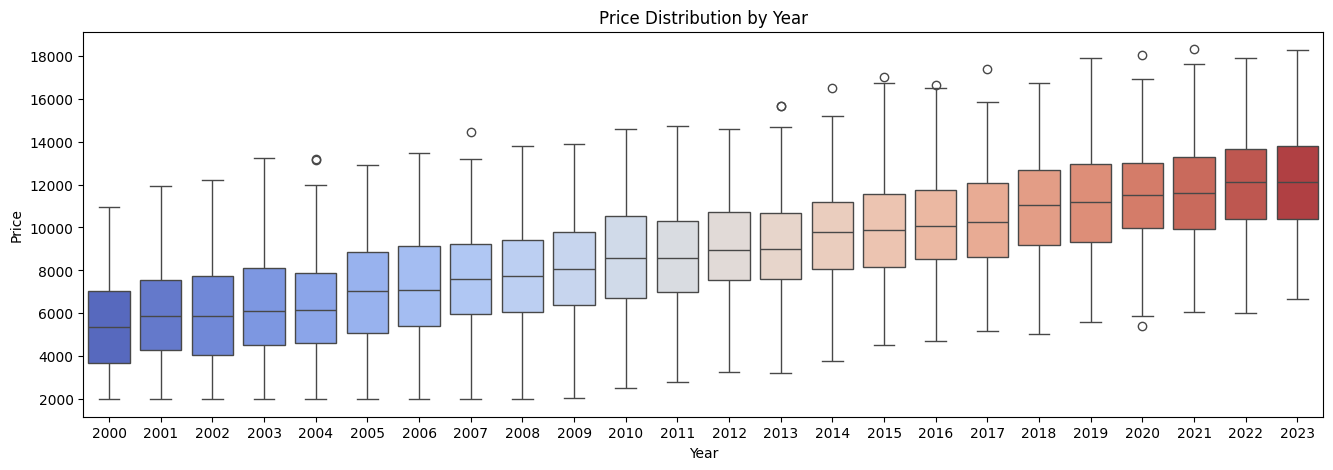

In [42]:
plt.figure(figsize=(16,5))
sns.boxplot(x="Year", y="Price", data=car_df, palette="coolwarm")
plt.title("Price Distribution by Year")
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

 **Distribuition Normatility Test**

In [43]:
# Data Normalization
price_norm = (car_df['Price'] - np.mean(car_df['Price'])) / np.std(car_df['Price'])
year_norm = (car_df['Year'] - np.mean(car_df['Year'])) / np.std(car_df['Year'])

stat3, p_value3 = kstest(price_norm, 'norm')
stat4, p_value4 = kstest(year_norm, 'norm')

print(f"Kolmogorov-Smirnov Test for Price: Statistic={stat3:.4f}, p-value={p_value3:.4f}")
print(f"Kolmogorov-Smirnov Test for Year: Statistic={stat4:.4f}, p-value={p_value4:.4f}")

Kolmogorov-Smirnov Test for Price: Statistic=0.0161, p-value=0.0108
Kolmogorov-Smirnov Test for Year: Statistic=0.0785, p-value=0.0000


 **Pearson Correlation**

In [44]:
corr_pearson, p_value = pearsonr(car_df['Price'], car_df['Year'])
print(f"Pearson Correlation: {corr_pearson:.4f}, p-value: {p_value:.4f}")

Pearson Correlation: 0.6630, p-value: 0.0000


In [45]:
corr_spearman, p_value = spearmanr(car_df['Price'], car_df['Year'])
print(f"Spearman Correlation: {corr_spearman:.4f}, p-value: {p_value:.4f}")

Spearman Correlation: 0.6627, p-value: 0.0000


 **Group comparations**

In [46]:
# Creating separate lists for each Brand group
groups_price = [group["Price"].values for _, group in car_df.groupby("Brand")]
groups_year = [group["Year"].values for _, group in car_df.groupby("Brand")]

# Aplying Kruskal-Wallis test
stat_price, p_price = kruskal(*groups_price)
stat_year, p_year = kruskal(*groups_year)

# Displaying the results
print(f"Kruskal-Wallis Test for Price: Statistic={stat_price:.4f}, p-value={p_price:.4f}")
if p_price < 0.05:
    print("There is a statistically significant difference in Price between at least two Brands.")
else:
    print("There is no statistically significant difference in Price between Brands.")

print(f"Kruskal-Wallis Test for Year: Statistic={stat_year:.4f}, p-value={p_year:.4f}")
if p_year < 0.05:
    print("There is a statistically significant difference in Year between at least two Brands.")
else:
    print("There is no statistically significant difference in Year between Brands.")

Kruskal-Wallis Test for Price: Statistic=12.2586, p-value=0.1991
There is no statistically significant difference in Price between Brands.
Kruskal-Wallis Test for Year: Statistic=8.6817, p-value=0.4672
There is no statistically significant difference in Year between Brands.


In [47]:
# Apply Dunn’s Test with Bonferroni adjustment
posthoc_results = posthoc_dunn(car_df, val_col="Price", group_col="Year", p_adjust="bonferroni")

print("Dunn's Test Results:")
print(posthoc_results)

Dunn's Test Results:
               2000           2001           2002           2003  \
2000   1.000000e+00   1.000000e+00   1.000000e+00   3.706538e-01   
2001   1.000000e+00   1.000000e+00   1.000000e+00   1.000000e+00   
2002   1.000000e+00   1.000000e+00   1.000000e+00   1.000000e+00   
2003   3.706538e-01   1.000000e+00   1.000000e+00   1.000000e+00   
2004   1.091214e-01   1.000000e+00   1.000000e+00   1.000000e+00   
2005   3.590219e-08   7.014370e-04   2.408282e-03   5.409960e-01   
2006   1.284425e-12   2.266850e-07   8.374220e-07   1.674846e-03   
2007   4.036788e-19   1.218711e-12   4.156763e-12   1.733330e-07   
2008   1.734636e-19   4.116518e-13   1.416445e-12   5.328414e-08   
2009   5.255597e-28   2.582191e-20   6.599595e-20   9.263369e-14   
2010   3.894475e-41   1.055064e-31   1.241959e-31   3.987127e-23   
2011   1.645457e-44   1.258583e-34   1.127022e-34   1.623944e-25   
2012   8.878220e-57   9.885320e-46   3.685273e-46   4.213566e-35   
2013   2.726219e-59   4.264

📊 **Conclusions**

✅ Car prices vary significantly between more distant years (example: 2000 vs. 2023 has a p-value close to 0).

✅ For more recent years, the price variation may not be statistically significant (example: 2022 vs. 2023).

✅ This reinforces the idea that car prices decrease over the years due to natural depreciation and other market factors.

## **Price X Transmission**

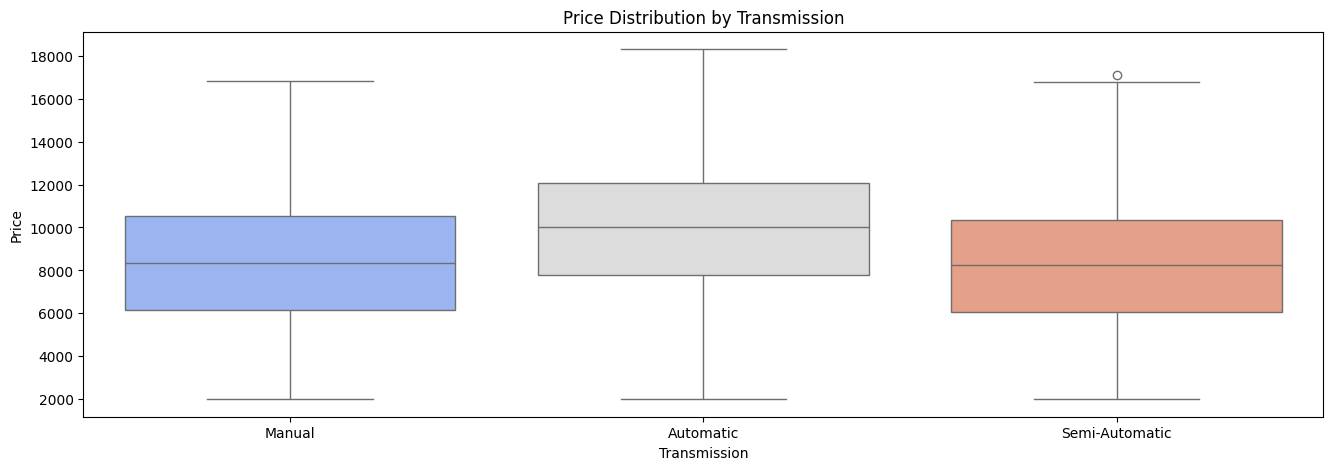

In [48]:
plt.figure(figsize=(16,5))
sns.boxplot(x="Transmission", y="Price", data=car_df, palette="coolwarm")
plt.title("Price Distribution by Transmission")
plt.xlabel("Transmission")
plt.ylabel("Price")
plt.show()

**Comparison between Groups Price and Transmission**

In [49]:
# Group prices by transmission type
transmission_groups = [group["Price"].values for _, group in car_df.groupby("Transmission")]

# Kruskal-Wallis test
stat, p_value = kruskal(*transmission_groups)

# Display result with interpretation
print(f"Kruskal-Wallis Test: Statistic={stat:.4f}, p-value={p_value:.4f}")

# Interpretation of the result
if p_value < 0.05:
    print("There is a statistically significant difference between at least two transmission types.")
else:
    print("There is no statistically significant difference between the transmission types.")

Kruskal-Wallis Test: Statistic=560.0402, p-value=0.0000
There is a statistically significant difference between at least two transmission types.


In [50]:
# Apply Dunn’s Test with Bonferroni adjustment
posthoc_results = posthoc_dunn(car_df, val_col="Price", group_col="Transmission", p_adjust="bonferroni")

print("Dunn's Test Results:")
print(posthoc_results)

Dunn's Test Results:
                   Automatic        Manual  Semi-Automatic
Automatic       1.000000e+00  5.874383e-88    9.750534e-98
Manual          5.874383e-88  1.000000e+00    6.997661e-01
Semi-Automatic  9.750534e-98  6.997661e-01    1.000000e+00


**Conclusions:**

1️⃣ Automatic cars have significantly different prices than manual and semi-automatic cars.

2️⃣ There is no statistically significant difference between the prices of manual and semi-automatic cars.

📊 This confirms what the boxplot suggests:

Automatic cars tend to have higher prices than other transmission types.

The difference between manual and semi-automatic is not statistically significant.

##**Price X Fuel Type**

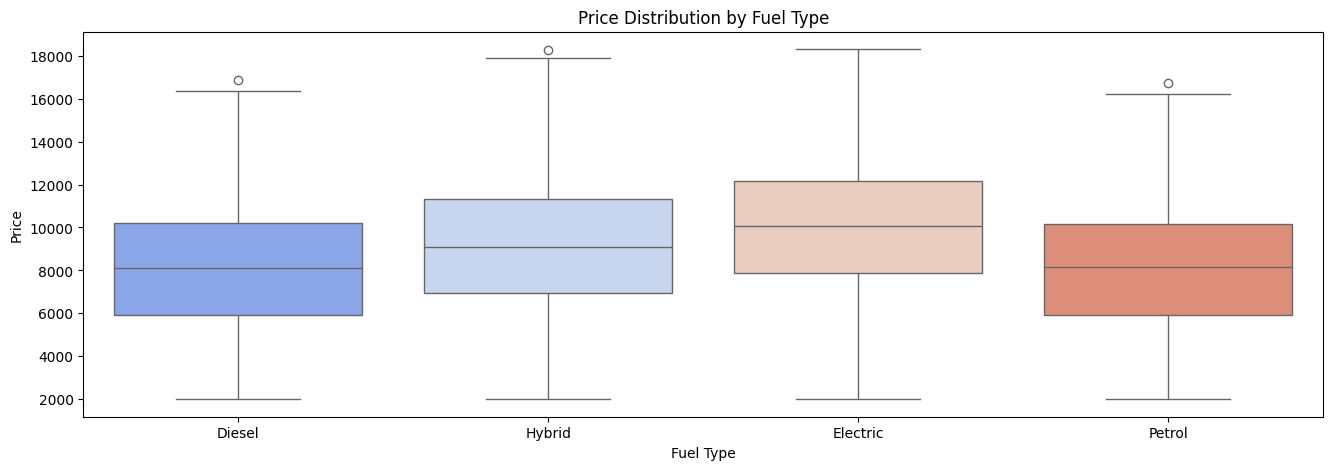

In [51]:
plt.figure(figsize=(16,5))
sns.boxplot(x="Fuel_Type", y="Price", data=car_df, palette="coolwarm")
plt.title("Price Distribution by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Price")
plt.show()

 **Group comparations**

In [52]:
# Group prices by fuel type
fuel_groups = [group["Price"].values for _, group in car_df.groupby("Fuel_Type")]

# Kruskal-Wallis test
stat, p_value = kruskal(*fuel_groups)

# Display result with interpretation
print(f"Kruskal-Wallis Test: Statistic={stat:.4f}, p-value={p_value:.4f}")

# Interpretation of the result
if p_value < 0.05:
    print("There is a statistically significant difference between at least two fuel types.")
else:
    print("There is no statistically significant difference between the fuel types.")

Kruskal-Wallis Test: Statistic=636.2282, p-value=0.0000
There is a statistically significant difference between at least two fuel types.


In [53]:
# Apply Dunn’s Test with Bonferroni adjustment
posthoc_results = posthoc_dunn(car_df, val_col="Price", group_col="Fuel_Type", p_adjust="bonferroni")

print("Dunn's Test Results:")
print(posthoc_results)

Dunn's Test Results:
                Diesel       Electric        Hybrid         Petrol
Diesel    1.000000e+00   3.118722e-99  6.477004e-27   1.000000e+00
Electric  3.118722e-99   1.000000e+00  4.252789e-23  1.425458e-101
Hybrid    6.477004e-27   4.252789e-23  1.000000e+00   1.191686e-28
Petrol    1.000000e+00  1.425458e-101  1.191686e-28   1.000000e+00


📊 **Conclusions**

1️⃣ The prices of electric cars are significantly different from those of other fuels.

2️⃣ The prices of hybrid cars are also significantly different from the other groups.

3️⃣ The prices of diesel and gasoline (petrol) cars do not show statistically significant differences.

**Prices for Fuel type (Mean and Median)**

In [54]:
print(car_df.groupby("Fuel_Type")["Price"].agg(["mean", "median"]))

                   mean   median
Fuel_Type                       
Diesel      8117.336385   8107.0
Electric   10032.220190  10051.0
Hybrid      9113.030167   9110.0
Petrol      8070.561826   8167.5


## **Price X Doors**

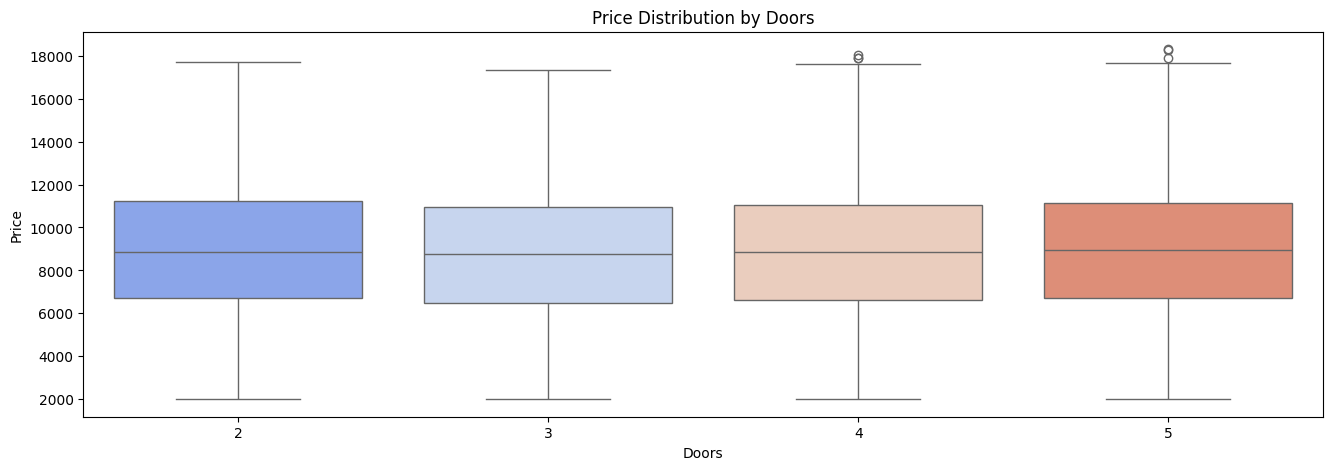

In [55]:
plt.figure(figsize=(16,5))
sns.boxplot(x="Doors", y="Price", data=car_df, palette="coolwarm")
plt.title("Price Distribution by Doors")
plt.xlabel("Doors")
plt.ylabel("Price")
plt.show()

**Group comparations**

In [56]:
# Group prices by doors
doors_groups = [group["Price"].values for _, group in car_df.groupby("Doors")]

# Kruskal-Wallis test
stat, p_value = kruskal(*doors_groups)

# Display result with interpretation
print(f"Kruskal-Wallis Test: Statistic={stat:.4f}, p-value={p_value:.4f}")

# Interpretation of the result
if p_value < 0.05:
    print("There is a statistically significant difference between at least two doors types.")
else:
    print("There is no statistically significant difference between the doors types.")

Kruskal-Wallis Test: Statistic=4.3436, p-value=0.2267
There is no statistically significant difference between the doors types.


In [57]:
# Apply Dunn’s Test with Bonferroni adjustment
posthoc_results = posthoc_dunn(car_df, val_col="Price", group_col="Doors", p_adjust="bonferroni")

print("Dunn's Test Results:")
print(posthoc_results)

Dunn's Test Results:
          2         3    4         5
2  1.000000  0.377485  1.0  1.000000
3  0.377485  1.000000  1.0  0.510118
4  1.000000  1.000000  1.0  1.000000
5  1.000000  0.510118  1.0  1.000000


In [58]:
print(car_df.groupby("Doors")["Price"].agg(["mean", "median"]))

              mean  median
Doors                     
2      8928.931161  8838.0
3      8746.446602  8774.0
4      8841.587908  8879.0
5      8900.352606  8951.0


📊 **Conclusions**

1️⃣ The number of doors does not significantly influence the price of cars.

2️⃣ The average prices of cars with 2, 3, 4 and 5 doors are statistically similar.

This means that the price of cars seems to be more influenced by other factors, such as the year of the vehicle, type of fuel and transmission, rather than the number of doors.



##**Price x Mileage**

In [59]:
# Create categories based on quartiles
bins = [0, 74649, 149587, 223577, car_df["Mileage"].max()]
labels = ["Low Mileage", "Medium Mileage", "High Mileage", "Very High Mileage"]

# Create new column with categories
car_df["Mileage_Group"] = pd.cut(car_df["Mileage"], bins=bins, labels=labels)

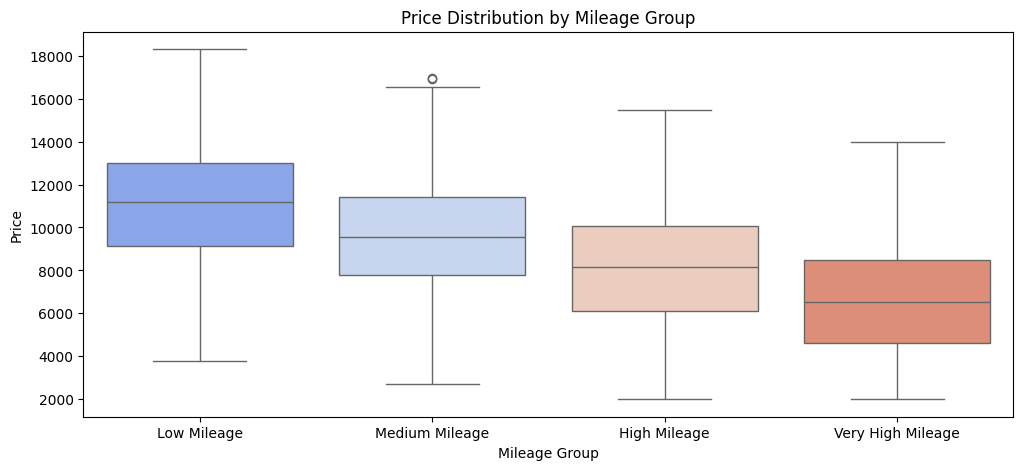

In [60]:
plt.figure(figsize=(12,5))
sns.boxplot(x="Mileage_Group", y="Price", data=car_df, palette="coolwarm")
plt.title("Price Distribution by Mileage Group")
plt.xlabel("Mileage Group")
plt.ylabel("Price")
plt.show()

 **Group comparations**

In [61]:
# Group prices by mileage
mileage_groups = [group["Price"].values for _, group in car_df.groupby("Mileage_Group")]

# Kruskal-Wallis test
stat, p_value = kruskal(*mileage_groups)

# Display result with interpretation
print(f"Kruskal-Wallis Test: Statistic={stat:.4f}, p-value={p_value:.4f}")

# Interpretation of the result
if p_value < 0.05:
    print("There is a statistically significant difference between at least two milage types.")
else:
    print("There is no statistically significant difference between the mileage types.")

Kruskal-Wallis Test: Statistic=2772.1303, p-value=0.0000
There is a statistically significant difference between at least two milage types.


In [62]:
# Apply Dunn’s Test with Bonferroni adjustment
posthoc_results = posthoc_dunn(car_df, val_col="Price", group_col="Mileage_Group", p_adjust="bonferroni")

print("Dunn's Test Results:")
print(posthoc_results)

Dunn's Test Results:
                     Low Mileage  Medium Mileage   High Mileage  \
Low Mileage         1.000000e+00    6.130071e-60  2.178074e-244   
Medium Mileage      6.130071e-60    1.000000e+00   4.787572e-64   
High Mileage       2.178074e-244    4.787572e-64   1.000000e+00   
Very High Mileage   0.000000e+00   1.060848e-243   1.337073e-59   

                   Very High Mileage  
Low Mileage             0.000000e+00  
Medium Mileage         1.060848e-243  
High Mileage            1.337073e-59  
Very High Mileage       1.000000e+00  


📊 **Conclusions**

1️⃣ Mileage has a statistically significant impact on car prices.

2️⃣ Cars with low mileage tend to have higher prices, while cars with very high mileage have significantly lower prices.

3️⃣ Each mileage level presents significant differences between them, reinforcing the importance of this factor in vehicle pricing.

## **Price X Owner Count**

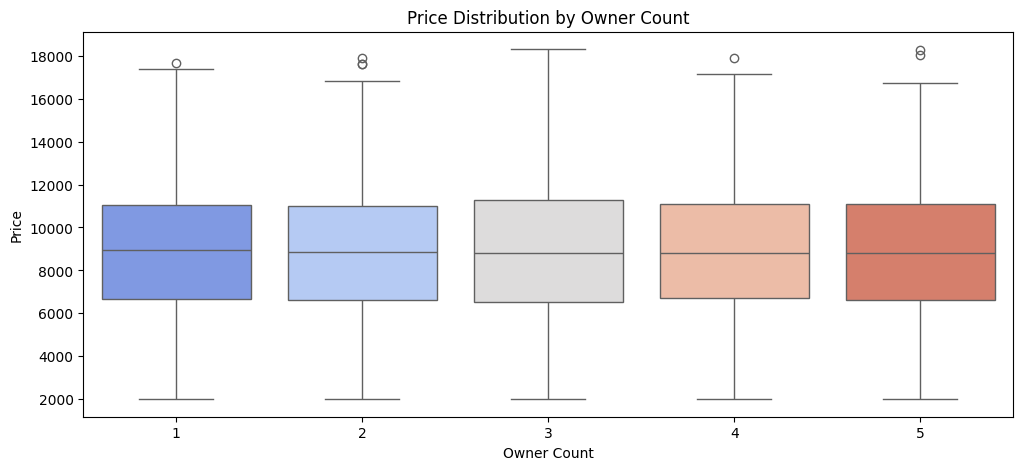

In [63]:
plt.figure(figsize=(12,5))
sns.boxplot(x="Owner_Count", y="Price", data=car_df, palette="coolwarm")
plt.title("Price Distribution by Owner Count")
plt.xlabel("Owner Count")
plt.ylabel("Price")
plt.show()

 **Group comparations**

In [64]:
# Group prices by owner count
owner_groups = [group["Price"].values for _, group in car_df.groupby("Owner_Count")]

# Kruskal-Wallis test
stat, p_value = kruskal(*owner_groups)

# Display result with interpretation
print(f"Kruskal-Wallis Test: Statistic={stat:.4f}, p-value={p_value:.4f}")

# Interpretation of the result
if p_value < 0.05:
    print("There is a statistically significant difference between at least two owner count types.")
else:
    print("There is no statistically significant difference between the owner count types.")

Kruskal-Wallis Test: Statistic=0.0548, p-value=0.9996
There is no statistically significant difference between the owner count types.


In [65]:
# Apply Dunn’s Test with Bonferroni adjustment
posthoc_results = posthoc_dunn(car_df, val_col="Price", group_col="Owner_Count", p_adjust="bonferroni")

print("Dunn's Test Results:")
print(posthoc_results)

Dunn's Test Results:
     1    2    3    4    5
1  1.0  1.0  1.0  1.0  1.0
2  1.0  1.0  1.0  1.0  1.0
3  1.0  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0  1.0
5  1.0  1.0  1.0  1.0  1.0


📊 **Conclusions**

1️⃣ The number of previous owners does not have a significant impact on the price of cars.

2️⃣ Regardless of whether a car has had 1 or 5 owners, its average price does not change in a statistically significant way.

3️⃣ Other factors, such as year, mileage and fuel type, may be more influential in vehicle pricing.



#📌 **General Conclusion on Car Price Analysis**

This comprehensive analysis of car pricing trends reveals key insights into the factors that significantly impact vehicle valuation.

1️⃣ Car age plays a crucial role in pricing—vehicles from distant years (e.g., 2000 vs. 2023) show significant price differences, reinforcing the concept of natural depreciation over time. However, price variations in recent years (e.g., 2022 vs. 2023) tend to be statistically insignificant.

2️⃣ Transmission type influences pricing, with automatic cars being significantly more expensive than manual and semi-automatic ones. However, there is no significant price difference between manual and semi-automatic vehicles.

3️⃣ Fuel type has a strong impact on price, particularly for electric and hybrid cars, which show significantly different pricing patterns compared to diesel and petrol vehicles. In contrast, diesel and petrol cars have similar price distributions.

4️⃣ Mileage is a critical factor, with cars having low mileage commanding higher prices and those with very high mileage experiencing significant depreciation. Every mileage category presents statistically significant differences, reinforcing its importance in price determination.

5️⃣ The number of doors does not affect pricing, as cars with 2, 3, 4, or 5 doors have statistically similar price distributions. Other factors such as fuel type, mileage, and transmission seem to have a more substantial impact.

6️⃣ The number of previous owners does not significantly influence the price. Regardless of whether a car has had one or multiple owners, its price remains statistically unchanged.
🚀 Key Takeaways

📌 Mileage, fuel type, transmission, and vehicle age are the strongest predictors of car prices.
📌 Ownership history and the number of doors have little to no impact on pricing.
📌 Depreciation is a dominant factor—newer cars retain higher prices, while older vehicles lose value over time.

This analysis provides valuable insights for buyers, sellers, and industry professionals looking to understand which factors truly impact car valuation. Future research could explore the interaction between these variables, potentially incorporating additional market-driven influences such as brand reputation, demand fluctuations, and economic conditions.

#📌 **Strategic Recommendations to Increase Car Sales**

Based on the data-driven insights from our analysis, here are key strategies to optimize pricing, marketing, and sales efforts:

1️⃣ **Leverage Mileage-Based Pricing Strategies**

🔹 Offer premium pricing for low-mileage cars – Since low mileage is associated with higher prices, emphasize low-mileage vehicles in advertising campaigns.

🔹 Provide attractive financing for high-mileage cars – Since high-mileage cars depreciate significantly, offering better loan terms, warranties, or discounts could make them more appealing.

📢 Marketing Tip: Use targeted ads highlighting “Low-Mileage Specials” for premium pricing and “Budget-Friendly Deals” for high-mileage vehicles.

2️⃣ **Capitalize on Fuel Type Trends**

🔹 Push electric and hybrid car sales – These cars show distinct pricing differences, meaning they appeal to a specific customer base. Offering incentives like tax rebates, financing deals, or free charging station access can drive more interest.

🔹 Maintain competitive pricing for petrol and diesel cars – Since their prices are statistically similar, focus on differentiating these models through features, warranties, or maintenance packages.

📢 Marketing Tip: Run separate campaigns for eco-conscious buyers (“Go Green with Hybrid & Electric”) and budget-conscious buyers (“Reliable Petrol & Diesel at the Best Prices”).

3️⃣ **Optimize Automatic Car Sales**

🔹 Highlight automatic transmission models – These vehicles have significantly higher prices, indicating higher perceived value.
🔹 Bundle premium features – Since automatic cars are already more expensive, bundling them with high-demand features like leather seats, advanced safety tech, or extended warranties can make them more attractive.

📢 Marketing Tip: Create special "Luxury Automatic Deals" to reinforce their high-value perception.

4️⃣ **Address Depreciation Concerns for Older Cars**

🔹 Target budget-conscious buyers – Older cars depreciate significantly, making them attractive to first-time buyers or cost-sensitive customers.

🔹 Offer extended warranties & certified pre-owned (CPO) programs – These add-ons reduce the perceived risk of buying an older vehicle.

📢 Marketing Tip: Introduce a “Certified Quality Guarantee” for older vehicles to build trust and reduce buyer hesitation.

5️⃣ **Remove Pricing Barriers for High-Owner Vehicles**

🔹 Educate customers on maintenance history over ownership count – Since our analysis shows that Owner_Count does not significantly impact price, dealerships should shift focus from ownership history to car condition and service records.

🔹 Offer extended service plans for multi-owner vehicles – Providing a service package or discounted maintenance plans can increase buyer confidence.

📢 Marketing Tip: Launch a “Well-Maintained, Great Value” campaign to highlight high-quality used cars regardless of ownership history.

🚀 **Final Strategy Recommendations**

✅ Highlight low-mileage cars for premium pricing & financing incentives for high-mileage cars.

✅ Capitalize on electric & hybrid car demand with tax rebates and exclusive offers.

✅ Leverage automatic cars as high-value, premium offerings.

✅ Encourage budget-conscious buyers with warranties and certification for older vehicles.

✅ Educate buyers that ownership history doesn’t impact quality—focus on maintenance records instead.

In [66]:
car_df.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price,Mileage_Group
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501,Very High Mileage
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092,Low Mileage
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171,Very High Mileage
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780,High Mileage
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867,Very High Mileage


In [67]:
car_df.to_csv("car_price_analysis.csv", index=False)